In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import loompy

# make the text in figures editable in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
"""function for calculating the percentage of cells expressing gene of interest"""
def percentage_exp(adata, genes):
    per_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X) # calculate the percentage of cells expressing gene(s) of interest
        per_list.append((gene, percentage*100)) # add the name of gene and the percentage to list
    return sorted(per_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list

"""function for calculating the number of cells expressing gene of interest"""
def number_exp(adata, genes):
    num_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X)# calculate the percentage of cells expressing gene(s) of interest
        num_list.append((gene, percentage*len(adata.X))) # add the name of gene and the number of cells expressing gene of intererest
    return sorted(num_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list

##
"""function for extracting the genes of interest depending on the category of receptor type from Guide to Pharmacology 'targets_and_families.csv'"""
def rec_type_list(prot_df, rec_type):
    prot_df = prot_df[prot_df['Type'] == rec_type] #isolate the data having the receptor type of interest from protein dataframe 
    prot_tuple = tuple(prot_df.loc[:,'MGI symbol'].dropna()); #making a tuple of the gene names från the protein name dataframe
    prot_list = [gene for gene in adata_w.var_names if gene.startswith(prot_tuple)] #to ensure gene in adata object, only have list with 
    return prot_list                                                              ## the genes existing in the adata object
    

"""function for calculating the number of cells belonging to specific categorical observation"""
def calc_celltype_observation(adata, observation):
    pd_adata = pd.DataFrame(index = adata.obs_names, columns = adata.var_names, data = adata.X) #convert AnnData object to a dataframe. 
    # does not work to make calculations directly onthe AnnData object
    pd_adata['obs_name'] = adata.obs[observation] #create new column in dataframe depending on the target observation in the AnnData object
    pd_celltype = pd.DataFrame(pd_adata.loc[pd_adata.index, 'obs_name']) # extract the index and the target observation
    pd_celltype = pd.DataFrame(pd_adata.groupby('obs_name').size(), columns = ['number_cells']) #calculate the number of cells belonging to each 
    return(pd_celltype)  

In [3]:
# read the Zeisel et al dataset
adata = sc.read_loom('l5_all.loom', sparse = False)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cl

In [4]:
adata = adata[adata.obs['Class'] == 'Neurons']
adata

View of AnnData object with n_obs × n_vars = 74539 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascula

In [5]:
calc_celltype_observation(adata, 'TaxonomyRank3')

,number_cells
obs_name,
Cerebellum neurons,5292
"Cholinergic, monoaminergic and peptidergic neurons",3977
Di- and mesencephalon neurons,10481
Enteric neurons,1105
Hindbrain neurons,1144
Immature neural,5466
Peripheral sensory neurons,1580
Spinal cord neurons,1922
Sympathetic neurons,886


In [6]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,5292
Cholinergic and monoaminergic neurons,1071
Dentate gyrus granule neurons,4368
Di- and mesencephalon excitatory neurons,6455
Di- and mesencephalon inhibitory neurons,4026
Enteric neurons,1105
Glutamatergic neuroblasts,644
Hindbrain neurons,1144
Non-glutamatergic neuroblasts,4822


In [7]:
# detect the ERCC sequences. Save as observation
adata.var["ERCC"] = [True if gene.startswith("ERCC-") else False for gene in adata.var_names]
ERCC_genes = [gene for gene in adata.var_names if gene.startswith('ERCC')]
#adata.obs['percent_ERCC_genes'] = np.sum(adata[:, ERCC_genes].X, axis=1)/ np.sum(adata.X, axis=1)
# detect mouse mitochondrial genes from www.ensemble.org. Save as observation
mito = set(sc.queries.mitochondrial_genes('mmusculus'))
adata.var["mito"] = [True if gene in mito else False for gene in adata.var_names]
# additional detection of mitochondrial genes. Add observation of calculated percentage of mitochondrial genes in each cell
mito_genes = [gene for gene in adata.var_names if gene.startswith('mt-')]
#adata.obs['percent_mito_genes'] = np.sum(adata[:, mito_genes].X, axis=1)/ np.sum(adata.X, axis=1)
# add the total counts per cell as observation
adata.obs['n_counts'] = np.sum(adata.X, axis=1)

Trying to set attribute `.var` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [9]:
#calculate the general metrics and the metrics of ERCC and mitochondrial genes
sc.pp.calculate_qc_metrics(adata,qc_vars= ['ERCC', 'mito'], inplace=True)
qc_vars= ['ERCC', 'mito']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


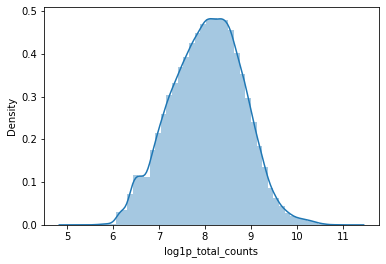

In [10]:
# plot the distribution of total counts in the adata_w object
sns.distplot(adata.obs['log1p_total_counts'])
f_count = adata.obs_vector('log1p_total_counts') > 6.5 # all cells having high logaritmized number of reads included

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


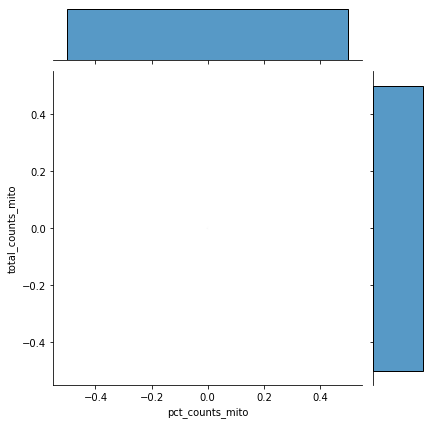

In [11]:
# plot the percentage of number of counts that are mitochondrial and total counts of mitochondrial genes. Mitochondrial genes not detected
sns.jointplot('pct_counts_mito', 'total_counts_mito', data=adata.obs, kind="hex")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


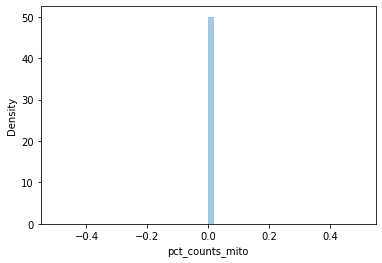

In [12]:
# plot the percentage of mitochondrial genes expressed. No mitochondrial can be detected.
sns.distplot(adata.obs['pct_counts_mito'])
m_count = adata.obs_vector('pct_counts_mito') < 0.1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


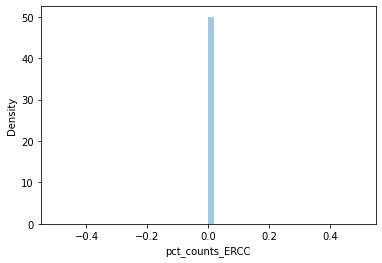

In [13]:
# plot the percentage of counts that are ERCC sequences
sns.distplot(adata.obs['pct_counts_ERCC'])
f_ercc = adata.obs_vector('pct_counts_ERCC')

... storing 'Age' as categorical
... storing 'AnalysisPool' as categorical
... storing 'AnalysisProject' as categorical
... storing 'Bucket' as categorical
... storing 'CellConc' as categorical
... storing 'Cell_Conc' as categorical
... storing 'ChipID' as categorical
... storing 'Class' as categorical
... storing 'ClusterName' as categorical
... storing 'Comment' as categorical
... storing 'Comments' as categorical
... storing 'DateCaptured' as categorical
... storing 'Date_Captured' as categorical
... storing 'Description' as categorical
... storing 'Developmental_compartment' as categorical
... storing 'DonorID' as categorical
... storing 'Estimated Number of Cells' as categorical
... storing 'Flowcell' as categorical
... storing 'Fraction Reads in Cells' as categorical
... storing 'Label' as categorical
... storing 'Location_based_on' as categorical
... storing 'Mean Reads per Cell' as categorical
... storing 'Median Genes per Cell' as categorical
... storing 'Median UMI Counts per

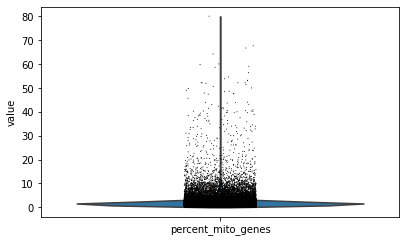

In [14]:
# plot the additional detection of mitochondrial genes in the AnnData object. Mitochondrial genes cannot be detected
mito_genes = [gene for gene in adata.var_names if gene.startswith('mt-')]
adata.obs['percent_mito_genes'] = (np.sum(adata[:, mito_genes].X, axis=1)/ np.sum(adata.X, axis=1))*100


sc.pl.violin(adata, 'percent_mito_genes')
m_count = adata.obs_vector('percent_mito_genes') < 30

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


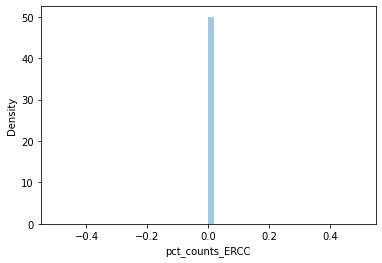

In [15]:
# plot the percentage of counts that are ERCC sequences
sns.distplot(adata.obs["pct_counts_ERCC"])
f_ercc = adata.obs_vector("pct_counts_ERCC") < 10 # cells with less than 10% ERCC counts included

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


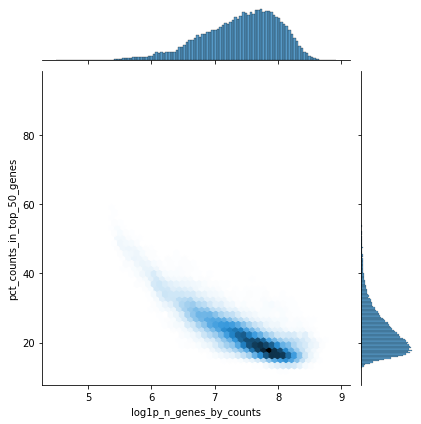

In [16]:
# plot the logaritmized number of genes by counts and the percentage of counts that express the top 50 most expressed genes
sns.jointplot('log1p_n_genes_by_counts', 'pct_counts_in_top_50_genes', data=adata.obs, kind="hex")
f_dist = adata.obs_vector('pct_counts_in_top_50_genes') < 50 # filter cells with distributed gene counts
f_capt = adata.obs_vector('log1p_n_genes_by_counts') > 6.0 # filter cells with broad gene capture

In [17]:
# filter cells based on inclusion criteria
#f_count, f_dist, f_capt, f_ercc
f1 = np.logical_and(f_count, f_dist, m_count)
f2 = np.logical_and(f_capt, f_ercc)
f = np.logical_and(f1,f2)
print(adata.shape)
adata = adata[f]


# only include genes that are detected in more than 3 neurons
sc.pp.filter_genes(adata, min_cells=3)
print(adata.shape)

(74539, 27998)


Trying to set attribute `.var` of view, copying.


(72128, 21183)


In [18]:
# normalize the number of reads per cell to the median number of reads
sc.pp.normalize_per_cell(adata, counts_per_cell_after= adata.obs['n_counts'].median())

# logaritmize data
sc.pp.log1p(adata)

In [19]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,3288
Cholinergic and monoaminergic neurons,1065
Dentate gyrus granule neurons,4357
Di- and mesencephalon excitatory neurons,6423
Di- and mesencephalon inhibitory neurons,4016
Enteric neurons,1025
Glutamatergic neuroblasts,637
Hindbrain neurons,1141
Non-glutamatergic neuroblasts,4774


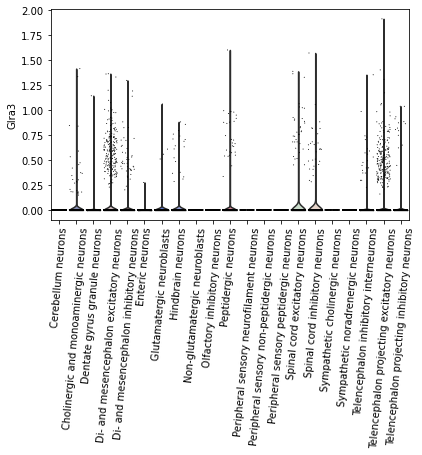

In [20]:
sc.pl.violin(adata, 'Glra3', use_raw = False, stripplot= True, jitter = 0.4, groupby = 'TaxonomyRank4', 
             rotation =85, save= 'violin_glra3_expression.pdf')

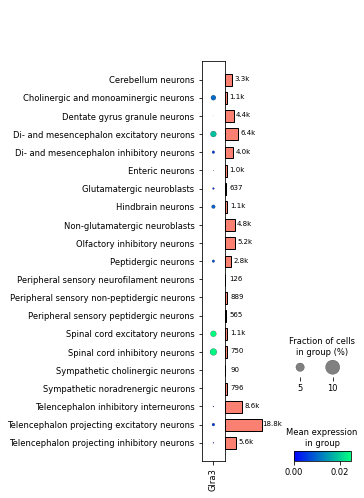

In [27]:
sc.pl.DotPlot(adata, 'Glra3', 
              use_raw = False, 
              groupby= 'TaxonomyRank4').add_totals().show()

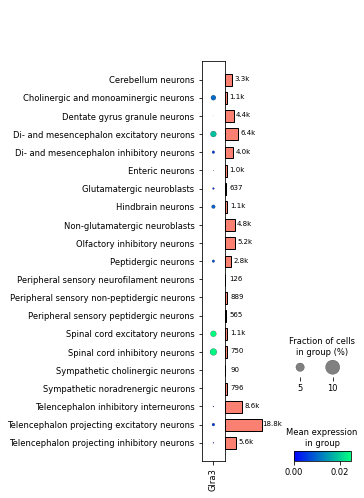

In [26]:
sc.pl.DotPlot(adata, 'Glra3', 
              use_raw = False, 
              groupby= 'TaxonomyRank4').add_totals().savefig('glra3_expression_all.pdf')

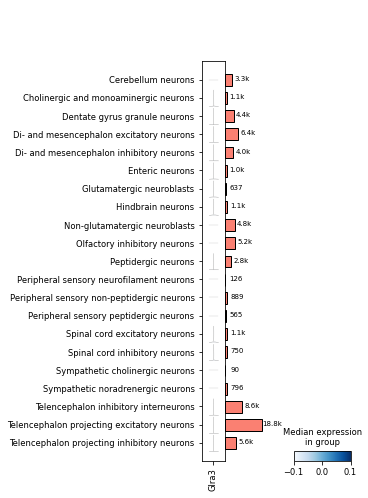

In [28]:
sc.pl.StackedViolin(adata, 'Glra3', 
              use_raw = False, 
              groupby= 'TaxonomyRank4').add_totals().show()

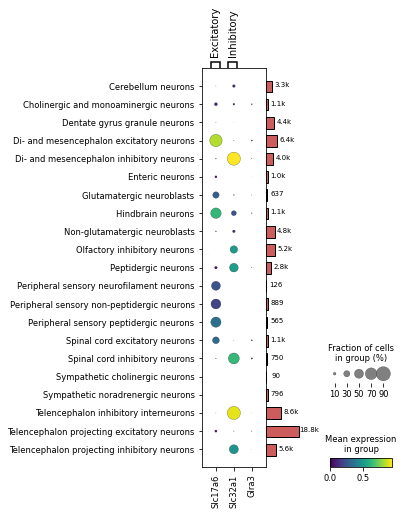

In [68]:
marker_genes = ['Slc17a6','Slc32a1','Glra3']
glyr_genes = ['Glra1', 'Glra2', 'Glra3', 'Glra4', 'Glrb']
#glyr_plot = sc.pl.dotplot(adata, marker_genes, use_raw = False, groupby = 'TaxonomyRank4')
#glyr_plot.add_totals().style(dot_edge_color = 'black', dot_edge_lw=0.5)
#glyr_plot.show()

labels = ['Excitatory', 'Inhibitory']
label_pos = [(0,0), (1,1)]

sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', cmap ='viridis').add_totals(color= 'indianred').show()
#glyr_plot.add_totals()#.style(dot_edge_color = 'black', dot_edge_lw=0.5)
#glyr_plot.show()
#sc.pl.dotplot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, use_raw = False, groupby = 'TaxonomyRank4')

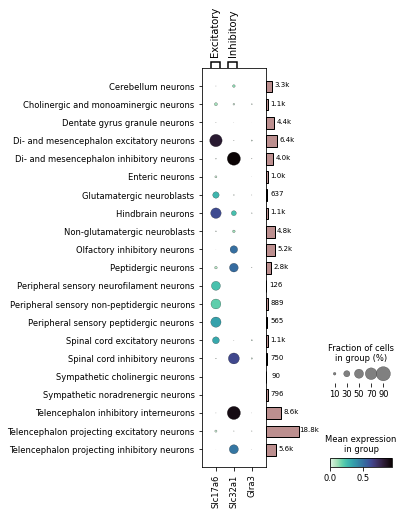

In [64]:
sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', cmap ='mako_r').add_totals(color = 'rosybrown').savefig('marker_expression_all.pdf')

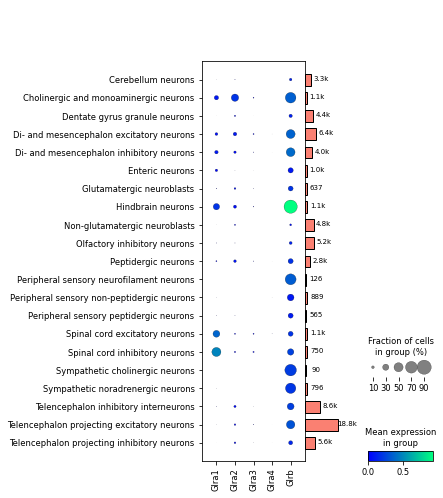

In [31]:
sc.pl.DotPlot(adata, glyr_genes,use_raw = False, groupby = 'TaxonomyRank4').add_totals().savefig('glrexpression_all.pdf')

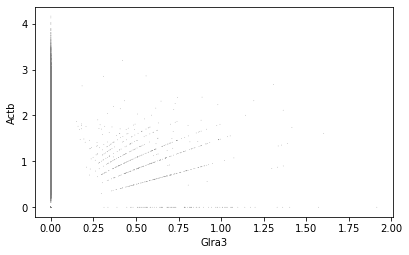

In [33]:
sc.pl.scatter(adata, x = 'Glra3', y = 'Actb', use_raw = False)

In [34]:
adata.obs['glra3_cell'] = (adata[:, 'Glra3'].X > 0.1).astype(str)

In [35]:
percentage_exp(adata, glyr_genes)

[('Glrb', 32.52273735581189),
 ('Glra2', 6.294365572315883),
 ('Glra1', 4.00399290150843),
 ('Glra3', 0.8720607808340728),
 ('Glra4', 0.020796362023070097)]

In [36]:
adata_glra3 = adata[adata.obs['glra3_cell'] == 'True']
adata_glra3

View of AnnData object with n_obs × n_vars = 629 × 21183
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular'

In [37]:
number_glra3_cells_area = calc_celltype_observation(adata_glra3, 'TaxonomyRank4')
number_glra3_cells_area

,number_cells
obs_name,
Cholinergic and monoaminergic neurons,26
Dentate gyrus granule neurons,1
Di- and mesencephalon excitatory neurons,197
Di- and mesencephalon inhibitory neurons,43
Enteric neurons,1
Glutamatergic neuroblasts,4
Hindbrain neurons,18
Peptidergic neurons,29
Spinal cord excitatory neurons,35


In [39]:
number_all_cells_area = calc_celltype_observation(adata, 'TaxonomyRank4')
number_all_cells_area

,number_cells
obs_name,
Cerebellum neurons,3288
Cholinergic and monoaminergic neurons,1065
Dentate gyrus granule neurons,4357
Di- and mesencephalon excitatory neurons,6423
Di- and mesencephalon inhibitory neurons,4016
Enteric neurons,1025
Glutamatergic neuroblasts,637
Hindbrain neurons,1141
Non-glutamatergic neuroblasts,4774


In [40]:
print(number_glra3_cells_area/number_all_cells_area*100)

                                             number_cells
obs_name                                                 
Cerebellum neurons                                    NaN
Cholinergic and monoaminergic neurons            2.441315
Dentate gyrus granule neurons                    0.022952
Di- and mesencephalon excitatory neurons         3.067103
Di- and mesencephalon inhibitory neurons         1.070717
Enteric neurons                                  0.097561
Glutamatergic neuroblasts                        0.627943
Hindbrain neurons                                1.577564
Non-glutamatergic neuroblasts                         NaN
Olfactory inhibitory neurons                          NaN
Peptidergic neurons                              1.019691
Peripheral sensory neurofilament neurons              NaN
Peripheral sensory non-peptidergic neurons            NaN
Peripheral sensory peptidergic neurons                NaN
Spinal cord excitatory neurons                   3.046127
Spinal cord in

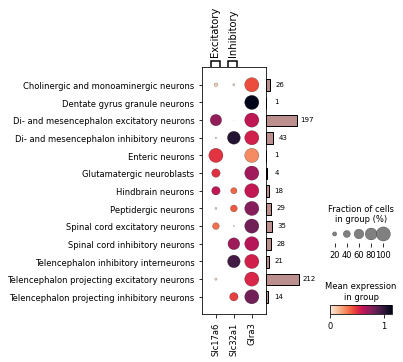

In [62]:
labels = ['Excitatory', 'Inhibitory']
label_pos = [(0,0), (1,1)]

sc.pl.DotPlot(adata_glra3, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', cmap = 'rocket_r').add_totals(color = 'rosybrown').savefig('marker_expression_glra3_cells.pdf')

In [42]:
percentage_exp(adata_glra3, marker_genes)

[('Glra3', 100.0),
 ('Glrb', 46.42289348171701),
 ('Slc17a7', 34.65818759936407),
 ('Slc17a6', 31.63751987281399),
 ('Gad2', 23.370429252782195),
 ('Gad1', 20.66772655007949),
 ('Slc32a1', 16.85214626391097),
 ('Glra1', 14.149443561208267),
 ('Glra2', 12.241653418124006),
 ('Glra4', 0.0)]

In [43]:
calc_celltype_observation(adata, 'Sex')

,number_cells
obs_name,
1F,13506
1M,4160
1M 1F,10515
1M 2F,839
2M,6
2M 1F,4698
2M 2F,1309
?,1088
F,15937


In [44]:
calc_celltype_observation(adata_glra3, 'Sex')

,number_cells
obs_name,
1F,65
1M,119
1M 1F,157
1M 2F,3
2M 1F,15
2M 2F,1
?,14
F,111
M,143
